### Import libs


In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [9]:
# extracting files
import os, zipfile
if 'mnist-original.mat' not in os.listdir():
    with zipfile.ZipFile(os.path.join(os.getcwd(),'mnist-original.zip')) as zf:
        zf.extractall(os.getcwd())
    print('done extracting')
else:
    print('file existed')

file existed


In [2]:
from scipy.io import loadmat
mnist = loadmat("mnist-original.mat")

 Let's look at the data

In [3]:
dict.keys(mnist)

dict_keys(['__header__', '__version__', '__globals__', 'mldata_descr_ordering', 'data', 'label'])

In [4]:
y = mnist["label"][0]
x = mnist["data"].T

In [5]:
print(x.shape)
print(y.shape)

(70000, 784)
(70000,)


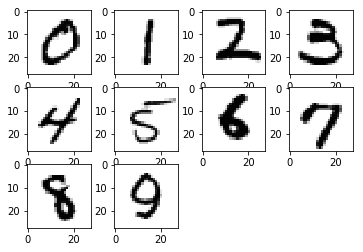

In [6]:
def image(num1, num2, S):
    plt.gray()
    plt.subplot(3,4,num1)
    plt.imshow((16-S[num2]/255*16).reshape(28,28))
    return
J = {(i+1):(i*6650) for i in list(range(10))}
for i in list(range(11))[1:11]: image(i,J[i],x)

As you can see, in a set of 70,000 handwritten numbers. Each has 784 signs that correspond to the picture 28x28.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
test_x, train_x, test_y, train_y = train_test_split(x, y, test_size=1/7.0, random_state=0)
print(train_x.shape)
print(test_x.shape)

(10000, 784)
(60000, 784)


### Principal component analysis (PCA)

In [9]:
from sklearn.decomposition import PCA


Projecting 784-dimensional data to 2D


Text(0.5, 1.0, 'MNIST. PCA projection')

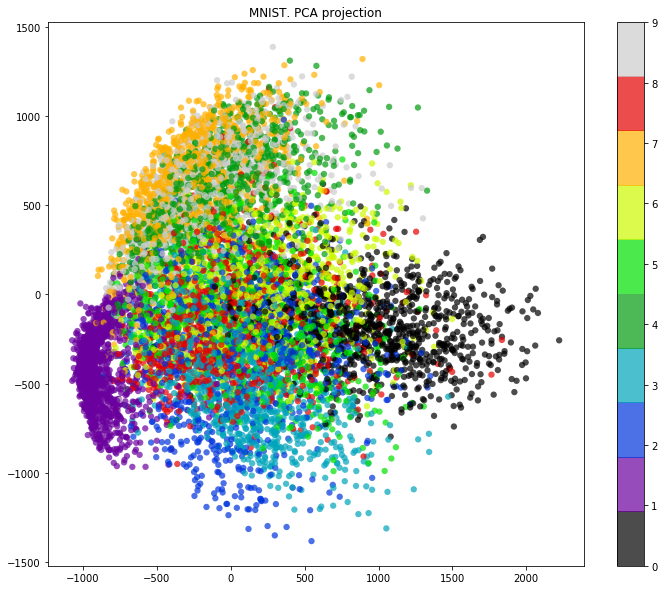

In [10]:
pca64 = PCA(n_components=64)
X_reduced = pca64.fit_transform(train_x)

print('Projecting %d-dimensional data to 2D' % train_x.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=train_y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection')

Projecting 784-dimensional data to 2D


Text(0.5, 1.0, 'MNIST. PCA projection')

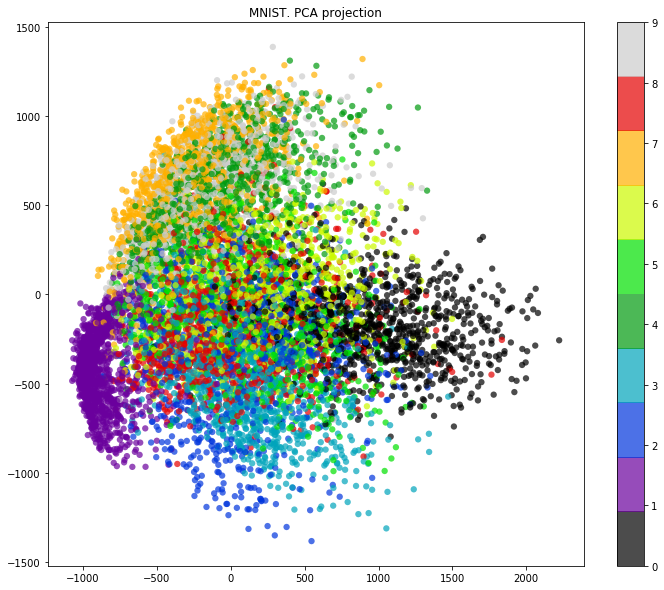

In [11]:
pca_2 = PCA(n_components=2)
X_reduced = pca_2.fit_transform(train_x)

print('Projecting %d-dimensional data to 2D' % train_x.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=train_y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection')

In practice, as a rule, so many principal components are chosen to leave 90% of the variance of the original data. To do this, you can specify the value n_components = 0.9

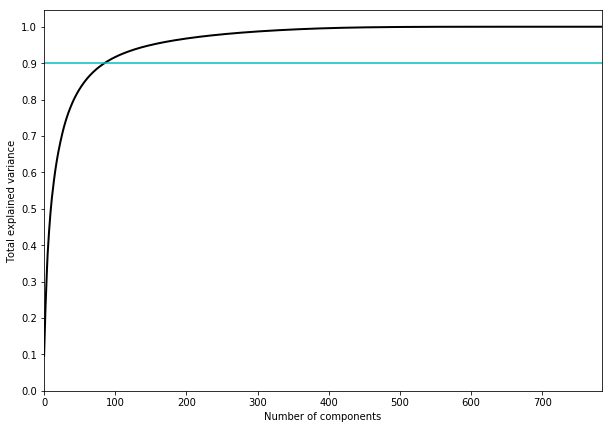

In [12]:
pca = PCA().fit(train_x)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 784)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.axhline(0.9, c='c')
plt.show();

Projecting 784-dimensional data to 2D


Text(0.5, 1.0, 'MNIST. PCA projection')

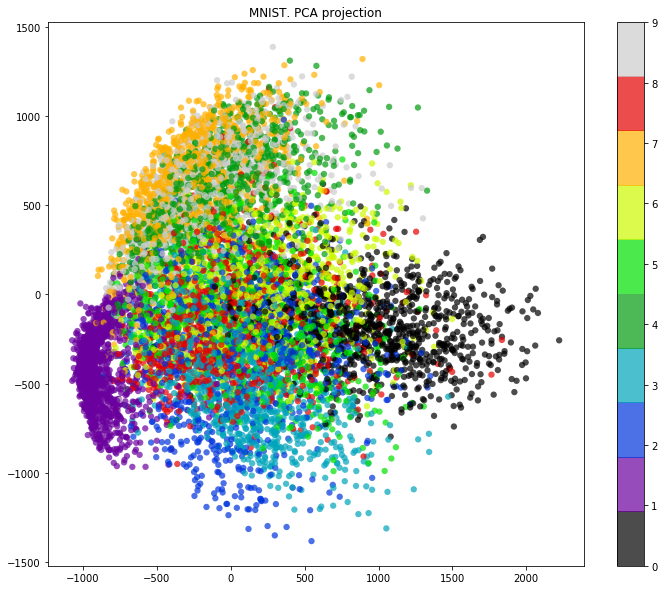

In [13]:
pca1 = PCA(n_components=0.9)
X_reduced1 = pca1.fit_transform(train_x)

print('Projecting %d-dimensional data to 2D' % train_x.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced1[:, 0], X_reduced1[:, 1], c=train_y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection')

In [14]:
pca1.n_components_

86

Try to use **MinMaxScaler, StandardScaler, RobustScaler, Normalizer** for **PCA 

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer

In [16]:
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()
scaler3 = RobustScaler()
scaler4 = Normalizer()
scaler1.fit(train_x)
scaler2.fit(train_x)
scaler3.fit(train_x)
scaler4.fit(train_x)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Normalizer(copy=True, norm='l2')

In [17]:
train_img01 = scaler1.transform(train_x)
test_img01 = scaler1.transform(train_x)
train_img02 = scaler2.transform(train_x)
test_img02 = scaler2.transform(train_x)
train_img03 = scaler3.transform(train_x)
test_img03 = scaler3.transform(train_x)
train_img04 = scaler4.transform(train_x)
test_img04 = scaler4.transform(train_x)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Projecting 784-dimensional data to 2D


Text(0.5, 1.0, 'MNIST. PCA projection. MinMaxScaler. n_components = 86')

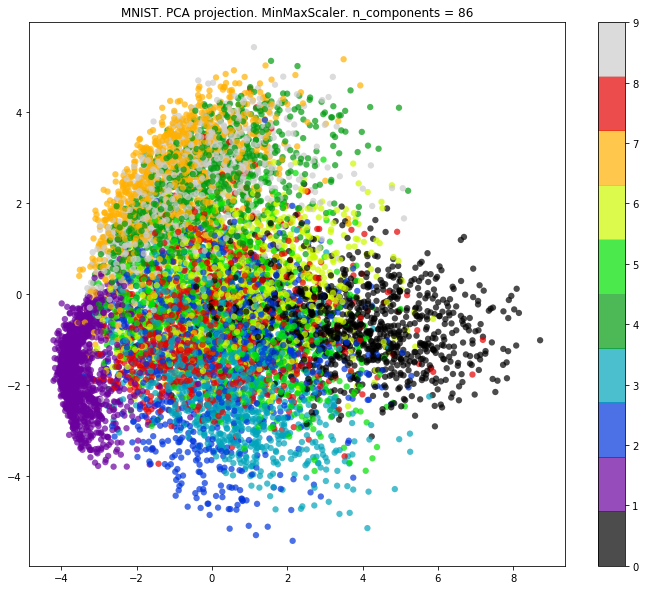

In [18]:
pca_minmax = PCA(n_components=0.9)
X_reduced2 = pca_minmax.fit_transform(train_img01)

print('Projecting %d-dimensional data to 2D' % train_img01.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced2[:, 0], X_reduced2[:, 1], c=train_y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection. MinMaxScaler. n_components = %d' % pca_minmax.n_components_)

Projecting 784-dimensional data to 2D


Text(0.5, 1.0, 'MNIST. PCA projection. StandardScaler.  n_components = 199')

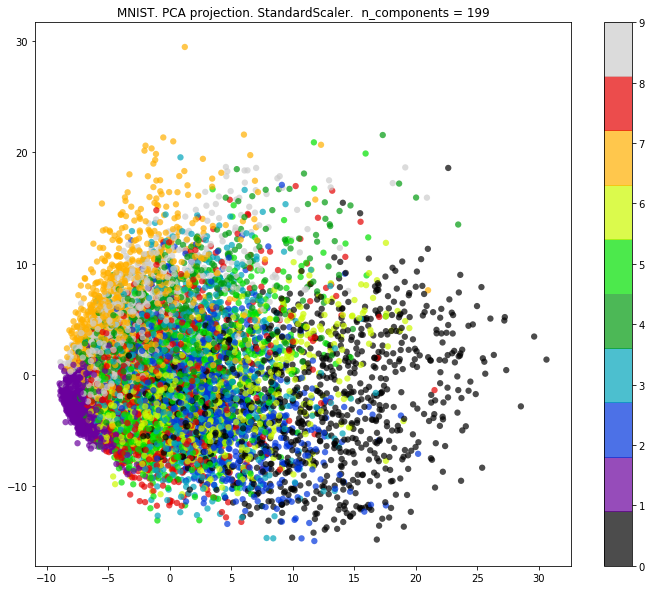

In [19]:
pca_stsc = PCA(n_components=0.9)
X_reduced2 = pca_stsc.fit_transform(train_img02)

print('Projecting %d-dimensional data to 2D' % train_img02.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced2[:, 0], X_reduced2[:, 1], c=train_y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection. StandardScaler.  n_components = %d' % pca_stsc.n_components_)

Projecting 784-dimensional data to 2D


Text(0.5, 1.0, 'MNIST. PCA projection. RobustScaler. n_components = 61')

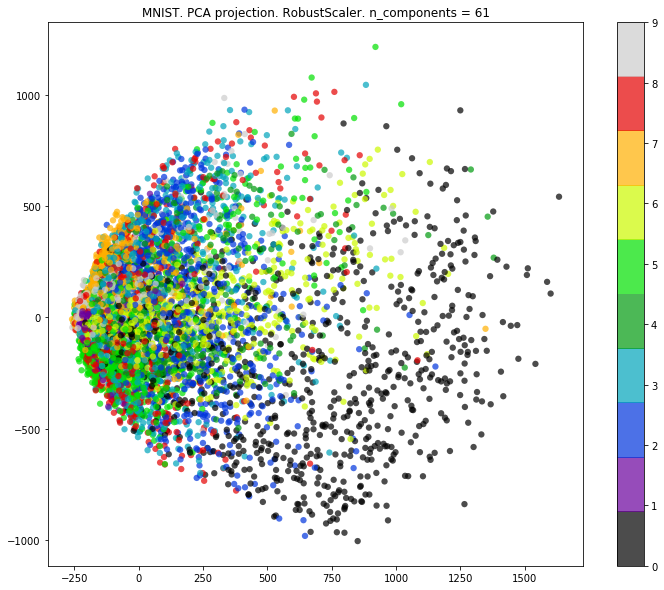

In [20]:
pca_rsc = PCA(n_components=0.9)
X_reduced2 = pca_rsc.fit_transform(train_img03)

print('Projecting %d-dimensional data to 2D' % train_img03.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced2[:, 0], X_reduced2[:, 1], c=train_y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection. RobustScaler. n_components = %d' % pca_rsc.n_components_)

Projecting 784-dimensional data to 2D


Text(0.5, 1.0, 'MNIST. PCA projection. Normalizer.  n_components = 92')

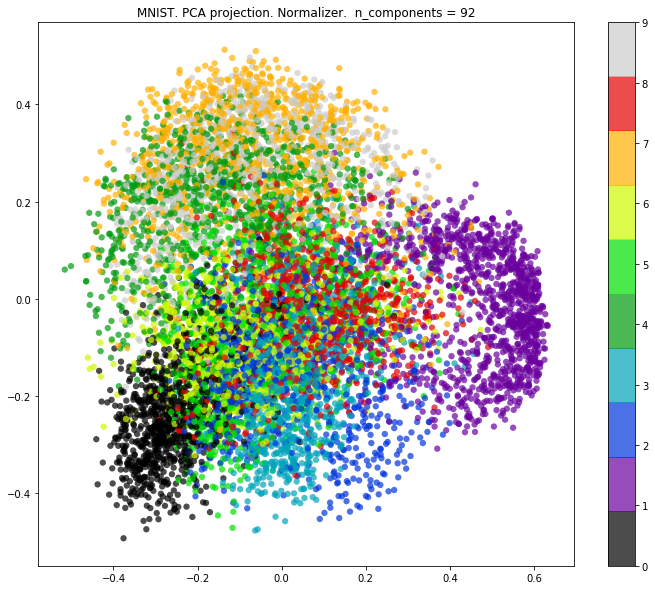

In [21]:
pca_norm = PCA(n_components=0.9)
X_reduced2 = pca_norm.fit_transform(train_img04)

print('Projecting %d-dimensional data to 2D' % train_img04.shape[1])

plt.figure(figsize=(12,10))
plt.scatter(X_reduced2[:, 0], X_reduced2[:, 1], c=train_y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection. Normalizer.  n_components = %d' % pca_norm.n_components_)

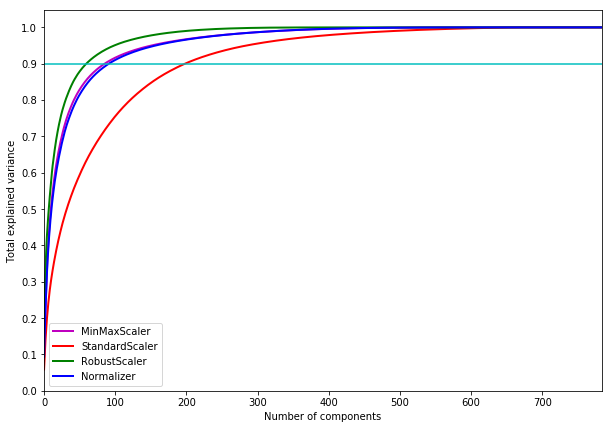

In [22]:
pca01 = PCA().fit(train_img01)
pca02 = PCA().fit(train_img02)
pca03 = PCA().fit(train_img03)
pca04 = PCA().fit(train_img04)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca01.explained_variance_ratio_), color='m', lw=2, label='MinMaxScaler')
plt.plot(np.cumsum(pca02.explained_variance_ratio_), color='r', lw=2, label='StandardScaler')
plt.plot(np.cumsum(pca03.explained_variance_ratio_), color='g', lw=2, label='RobustScaler')
plt.plot(np.cumsum(pca04.explained_variance_ratio_), color='b', lw=2, label='Normalizer')
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 784)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend();
plt.axhline(0.9, c='c')
plt.show()

Create some data sets for model learning.:  
    1. train_img64 -  64 components
    2. train_img_2 - 2 components
    3. train_img1 -  90% info(87 components)
    4. train_minmax, train_stsc, train_rsc, train_norm - 90% after preprocessing
  

In [23]:
train_img64 = pca64.transform(train_x)
test_img64 = pca64.transform(train_x)
train_img_2 = pca_2.transform(train_x)
test_img_2 = pca_2.transform(train_x)
train_img1 = pca1.transform(train_x)
test_img1 = pca1.transform(train_x)
train_minmax = pca_minmax.transform(train_x)
test_minmax = pca_minmax.transform(train_x)
train_stsc = pca_stsc.transform(train_x)
test_stsc = pca_stsc.transform(train_x)
train_rsc = pca_rsc.transform(train_x)
test_rsc = pca_rsc.transform(train_x)
train_norm = pca_norm.transform(train_x)
test_norm = pca_norm.transform(train_x)

**Restore data after PCA**

In [24]:
approximation1 = pca_minmax.inverse_transform(train_minmax)
approximation2 = pca_stsc.inverse_transform(train_stsc)
approximation3 = pca_rsc.inverse_transform(train_rsc)
approximation4 = pca_norm.inverse_transform(train_norm)

In [25]:
#approximation1 = scaler1.inverse_transform(approximation1)
#approximation2 = scaler2.inverse_transform(approximation2)
approximation3 = scaler3.inverse_transform(approximation3)


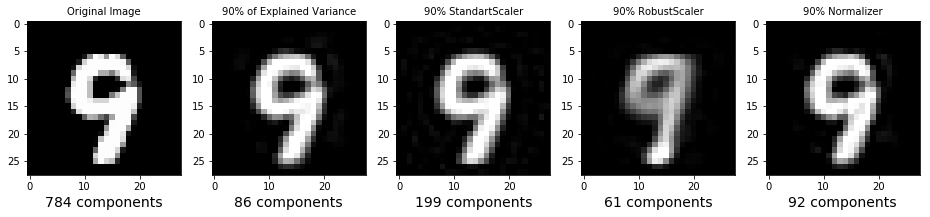

In [26]:
plt.figure(figsize=(16,8));

# Original Image
plt.subplot(1, 5, 1);
plt.imshow(train_x[1].reshape(28,28), 
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 10);

# MimMax
plt.subplot(1, 5, 2);
plt.imshow(approximation1[1].reshape(28, 28), 
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('%d components' % pca_minmax.n_components_, fontsize = 14)
plt.title('90% of Explained Variance', fontsize = 10);

#Standart
plt.subplot(1, 5, 3);
plt.imshow(approximation2[1].reshape(28, 28), 
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('%d components' % pca_stsc.n_components_, fontsize = 14)
plt.title('90% StandartScaler', fontsize = 10);

#Robust
plt.subplot(1, 5, 4);
plt.imshow(approximation3[1].reshape(28, 28), 
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('%d components' % pca_rsc.n_components_, fontsize = 14)
plt.title('90% RobustScaler', fontsize = 10);

# Normal
plt.subplot(1, 5, 5);
plt.imshow(approximation4[1].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('%d components' % pca_norm.n_components_, fontsize = 14)
plt.title('90% Normalizer', fontsize = 10);

## Clusterization

In [27]:
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import v_measure_score, silhouette_score

In [28]:
def solver(Clust_met, train_x, train_y, n_cl):
    Sil = np.zeros((1,n_cl))
    Vsc = np.zeros((1,n_cl))
    for k in list(range(n_cl))[2:n_cl]:
        X = Clust_met(n_clusters = k).fit_predict(train_x)
        Sil[0][k] = silhouette_score(train_x, X, metric='euclidean')
        Vsc[0][k] = v_measure_score(train_y, X)
        #print('silhouette_score', Sil[0][k])
        #print('v_measure_score', Vsc[0][k])
        #print('-'*10)
    return Sil, Vsc

In [29]:
Sil1, Vsc1 = solver(KMeans, train_x, train_y, 30)

In [30]:
Sil2, Vsc2 = solver(AgglomerativeClustering, train_x, train_y, 30)

Text(0.5, 1.0, 'Original Data')

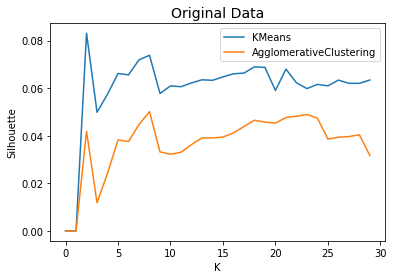

In [31]:
fig = plt.figure()
ax = plt.axes()
K = np.arange(0, 30)
ax.plot(K, Sil1[0], label = "KMeans")
ax.plot(K, Sil2[0], label = "AgglomerativeClustering")
plt.legend()
plt.xlabel("K")
plt.ylabel("Silhouette")
plt.title('Original Data', fontsize = 14)

Text(0.5, 1.0, 'Original Data')

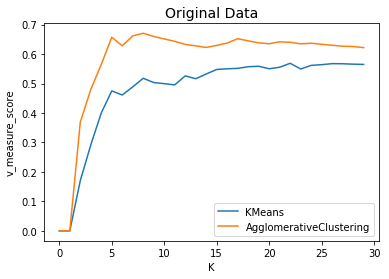

In [32]:
fig = plt.figure()
ax = plt.axes()
K = np.arange(0, 30)
ax.plot(K, Vsc1[0], label = "KMeans")
ax.plot(K, Vsc2[0], label = "AgglomerativeClustering")
plt.legend()
plt.xlabel("K")
plt.ylabel("v_measure_score")
plt.title('Original Data', fontsize = 14)

In [33]:
Sil1_norm, Vsc1_norm, = solver(KMeans, train_norm, train_y, 30)

In [34]:
Sil2_norm, Vsc2_norm = solver(AgglomerativeClustering, train_norm, train_y, 30)

In [35]:
Sil1_rsc, Vsc1_rsc, = solver(KMeans, train_rsc, train_y, 30)

In [36]:
Sil2_rsc, Vsc2_rsc = solver(AgglomerativeClustering, train_rsc, train_y, 30)

Text(0.5, 1.0, 'PCA Data')

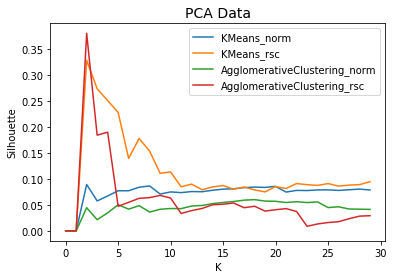

In [37]:
fig = plt.figure()
ax = plt.axes()
K = np.arange(0, 30)
ax.plot(K, Sil1_norm[0], label = "KMeans_norm")
ax.plot(K, Sil1_rsc[0], label = "KMeans_rsc")
ax.plot(K, Sil2_norm[0], label = "AgglomerativeClustering_norm")
ax.plot(K, Sil2_rsc[0], label = "AgglomerativeClustering_rsc")
plt.legend()
plt.xlabel("K")
plt.ylabel("Silhouette")
plt.title('PCA Data', fontsize = 14)

Text(0.5, 1.0, 'PCA Data')

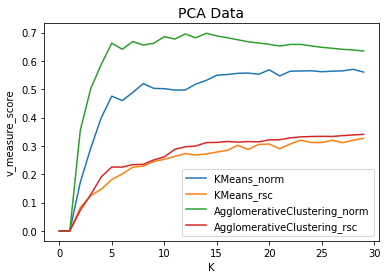

In [38]:
fig = plt.figure()
ax = plt.axes()
K = np.arange(0, 30)
ax.plot(K, Vsc1_norm[0], label = "KMeans_norm")
ax.plot(K, Vsc1_rsc[0], label = "KMeans_rsc")
ax.plot(K, Vsc2_norm[0], label = "AgglomerativeClustering_norm")
ax.plot(K, Vsc2_rsc[0], label = "AgglomerativeClustering_rsc")
plt.legend()
plt.xlabel("K")
plt.ylabel("v_measure_score")
plt.title('PCA Data', fontsize = 14)

### t-SNE


In [39]:
from sklearn.manifold import TSNE 

In [40]:
tsne = TSNE().fit_transform(train_x)

In [41]:
x_tsne = (tsne.T[0]).T
y_tsne = (tsne.T[1]).T

Text(0.5, 1.0, 'MNIST. tSNE')

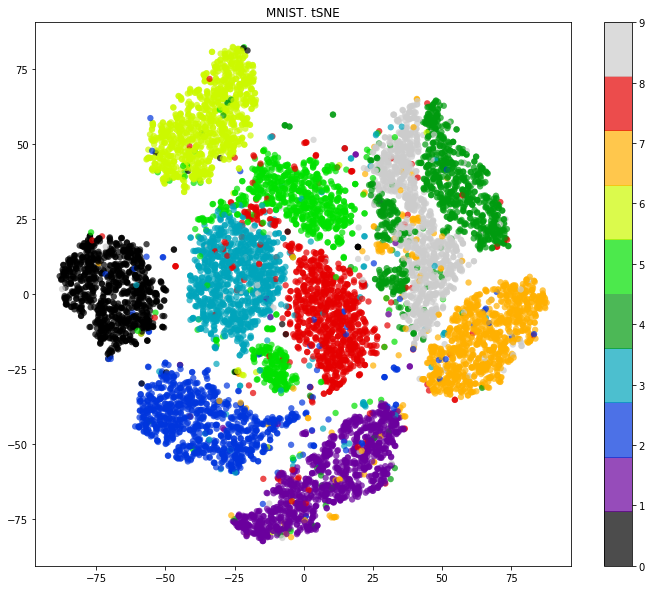

In [42]:
plt.figure(figsize=(12,10))
plt.scatter(x_tsne, y_tsne, c = train_y, edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. tSNE' )

In [43]:
XAGG_tsne = AgglomerativeClustering(n_clusters = 10).fit_predict(tsne)

In [44]:
XKM_tsne = KMeans(n_clusters = 10, n_jobs=-1).fit_predict(tsne)

In [45]:
XBir_tsne = Birch(n_clusters=10).fit_predict(tsne)

In [46]:
x11 = pd.DataFrame(XAGG_tsne)
x12 = pd.DataFrame(XKM_tsne)
x13 = pd.DataFrame(XBir_tsne)

In [47]:
X122 = pd.concat([x11, x12, x13], axis=1)

In [48]:
X122.head()

,0,0,0
0,9,7,9
1,5,2,2
2,2,7,6
3,2,4,6
4,0,6,0


In [49]:
silhouette_score(tsne, XAGG_tsne, metric='euclidean')

0.43636787

In [50]:
silhouette_score(tsne, XKM_tsne, metric='euclidean')

0.46285835

In [51]:
silhouette_score(tsne, XBir_tsne, metric='euclidean')

0.4459839

In [52]:
v_measure_score(train_y, XAGG_tsne)

0.7421923625072383

In [53]:
v_measure_score(train_y, XKM_tsne)

0.7381661203824672

In [54]:
v_measure_score(train_y, XBir_tsne)

0.7567856180689488

Text(0.5, 1.0, 'MNIST. tSNE ---> Birch')

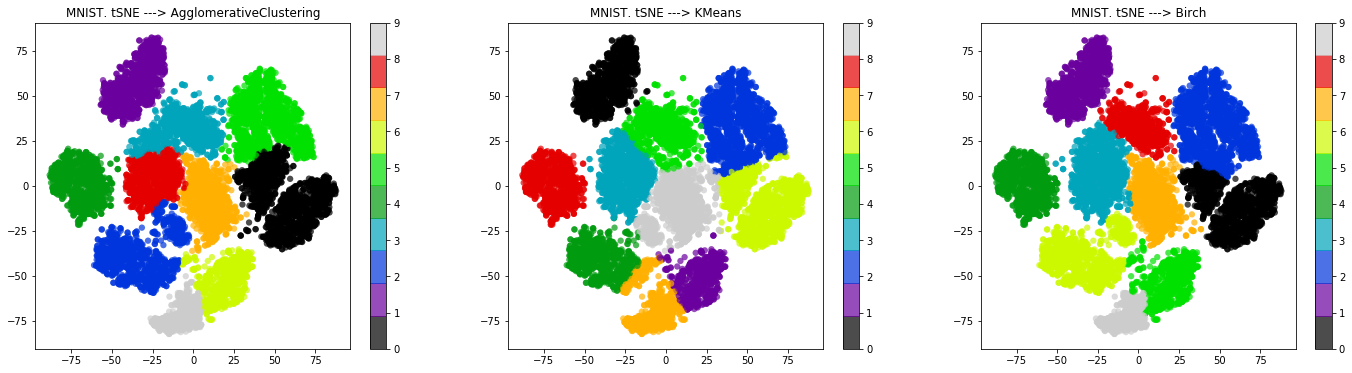

In [55]:
plt.figure(figsize=(24,6));

plt.subplot(1,3,1);
plt.scatter(x_tsne, y_tsne, c=XAGG_tsne, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. tSNE ---> AgglomerativeClustering')

plt.subplot(1,3,2)
plt.scatter(x_tsne, y_tsne, c=XKM_tsne, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. tSNE ---> KMeans')

plt.subplot(1,3,3)
plt.scatter(x_tsne, y_tsne, c=XBir_tsne, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. tSNE ---> Birch')

In [56]:
# function for solve
def clust_solve(model, datay, datas, name):
    X_ = pd.DataFrame()
    inf = pd.DataFrame()
    tmp = {}
    n = 1
    for data in datas:
        X_1 = model_agg.fit_predict(data)
        X_[str(name)+str(n)] = X_1
        #print('data ', n)
        tmp['data'] = 'data' + str(n)
        tmp['silhouette_score'] = silhouette_score(data, X_1, metric='euclidean', sample_size=10000)
        tmp['v_measure_score'] = v_measure_score(datay, X_1)
        inf = inf.append([tmp])
        n += 1
    return X_, inf

### AgglomerativeClustering

In [57]:
model_agg = AgglomerativeClustering(n_clusters=10)

In [58]:
trains = [train_x, train_img64, train_img_2, train_img1, 
          train_minmax, train_stsc, train_rsc, train_norm]

In [59]:
tests = [test_x[:10000], test_img64[:10000], test_img_2[:10000], test_img1[:10000], 
          test_minmax[:10000], test_stsc[:10000], test_rsc[:10000], test_norm[:10000]]

In [60]:
X_AGG, inf_AGG = clust_solve(model_agg, train_y, trains, name='agg')
inf_AGG

,data,silhouette_score,v_measure_score
0,data1,0.032216,0.651085
0,data2,0.046491,0.628544
0,data3,0.302834,0.345768
0,data4,0.041287,0.655400
0,data5,0.041287,0.655400
0,data6,0.044132,0.663310
0,data7,0.063173,0.261188
0,data8,0.043056,0.685399


In [61]:
X_AGG.head(10)

,agg1,agg2,agg3,agg4,agg5,agg6,agg7,agg8
0,7,9,1,6,6,5,0,7
1,4,4,9,1,1,9,0,1
2,0,0,0,4,4,6,2,2
3,6,0,4,5,5,6,2,6
4,5,6,8,2,2,7,3,5
5,8,7,1,6,6,8,0,4
6,1,3,4,9,9,2,1,3
7,1,8,2,0,0,1,2,8
8,1,8,4,0,0,1,6,8
9,4,5,5,1,1,4,1,9


In [62]:
X_AGGt, inf_AGGt = clust_solve(model_agg, test_y[:10000], tests, name='agg')
inf_AGGt

,data,silhouette_score,v_measure_score
0,data1,0.031576,0.656404
0,data2,0.046491,0.001807
0,data3,0.302834,0.002150
0,data4,0.041287,0.002227
0,data5,0.041287,0.002227
0,data6,0.044132,0.002226
0,data7,0.063173,0.001813
0,data8,0.043056,0.002046


In [63]:
X_AGGt.head(10)

,agg1,agg2,agg3,agg4,agg5,agg6,agg7,agg8
0,9,9,1,6,6,5,0,7
1,8,4,9,1,1,9,0,1
2,1,0,0,4,4,6,2,2
3,9,0,4,5,5,6,2,6
4,4,6,8,2,2,7,3,5
5,0,7,1,6,6,8,0,4
6,5,3,4,9,9,2,1,3
7,5,8,2,0,0,1,2,8
8,1,8,4,0,0,1,6,8
9,7,5,5,1,1,4,1,9


In [64]:
#x1 = pd.DataFrame(X_AGG)
#x1.to_csv('X_AGG.csv', sep=',', encoding='utf-8', index=False)

### KMeans

In [65]:
model_Kmeans = KMeans(n_clusters = 10, n_jobs=-1)

In [66]:
X_KM, inf_KM = clust_solve(model_Kmeans, train_y, trains, name='km')
inf_KM

,data,silhouette_score,v_measure_score
0,data1,0.032216,0.651085
0,data2,0.046491,0.628544
0,data3,0.302834,0.345768
0,data4,0.041287,0.655400
0,data5,0.041287,0.655400
0,data6,0.044132,0.663310
0,data7,0.063173,0.261188
0,data8,0.043056,0.685399


In [67]:
X_KM.head(10)

,km1,km2,km3,km4,km5,km6,km7,km8
0,7,9,1,6,6,5,0,7
1,4,4,9,1,1,9,0,1
2,0,0,0,4,4,6,2,2
3,6,0,4,5,5,6,2,6
4,5,6,8,2,2,7,3,5
5,8,7,1,6,6,8,0,4
6,1,3,4,9,9,2,1,3
7,1,8,2,0,0,1,2,8
8,1,8,4,0,0,1,6,8
9,4,5,5,1,1,4,1,9


In [68]:
X_KMt, inf_KMt = clust_solve(model_Kmeans, test_y[:10000], tests, name='km')
inf_KMt

,data,silhouette_score,v_measure_score
0,data1,0.031576,0.656404
0,data2,0.046491,0.001807
0,data3,0.302834,0.002150
0,data4,0.041287,0.002227
0,data5,0.041287,0.002227
0,data6,0.044132,0.002226
0,data7,0.063173,0.001813
0,data8,0.043056,0.002046


In [69]:
X_KMt.head(10)

,km1,km2,km3,km4,km5,km6,km7,km8
0,9,9,1,6,6,5,0,7
1,8,4,9,1,1,9,0,1
2,1,0,0,4,4,6,2,2
3,9,0,4,5,5,6,2,6
4,4,6,8,2,2,7,3,5
5,0,7,1,6,6,8,0,4
6,5,3,4,9,9,2,1,3
7,5,8,2,0,0,1,2,8
8,1,8,4,0,0,1,6,8
9,7,5,5,1,1,4,1,9
